In [89]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from IPython.display import HTML

In [2]:
df = pd.read_csv('train.csv')

# Titanic: Machine learning from disaster

***
* María Norin Hailla
* Matias Flores Soto
* Dante Araya Yeber
* Ernesto Lagos Pinaud
* Jordan Cárdenas Mercado
***
<img src="https://i.ibb.co/dcgnyNg/Screenshot-2021-04-28-Titanic-Deck-Plan-titanic-deck-plan-for-titanic-resource-pack-pdf-pdf.png" alt="Screenshot-2021-04-28-Titanic-Deck-Plan-titanic-deck-plan-for-titanic-resource-pack-pdf-pdf" border="0">

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


***
# Exploración temprana de los datos:
### En esta sección se observaran los datos para medir la cantidad de datos disponibles, ver la cantidad de datos perdidos, etc.
***

* Visualizando los datos perdidos:
El siguiente grafico es un heatmap que muestra los datos perdidos. Es muy simple de leer, ya que, lo único que 'grafica' es si hay o no un dato perdido en i, j : i filas j variables (columnas).

<AxesSubplot:>

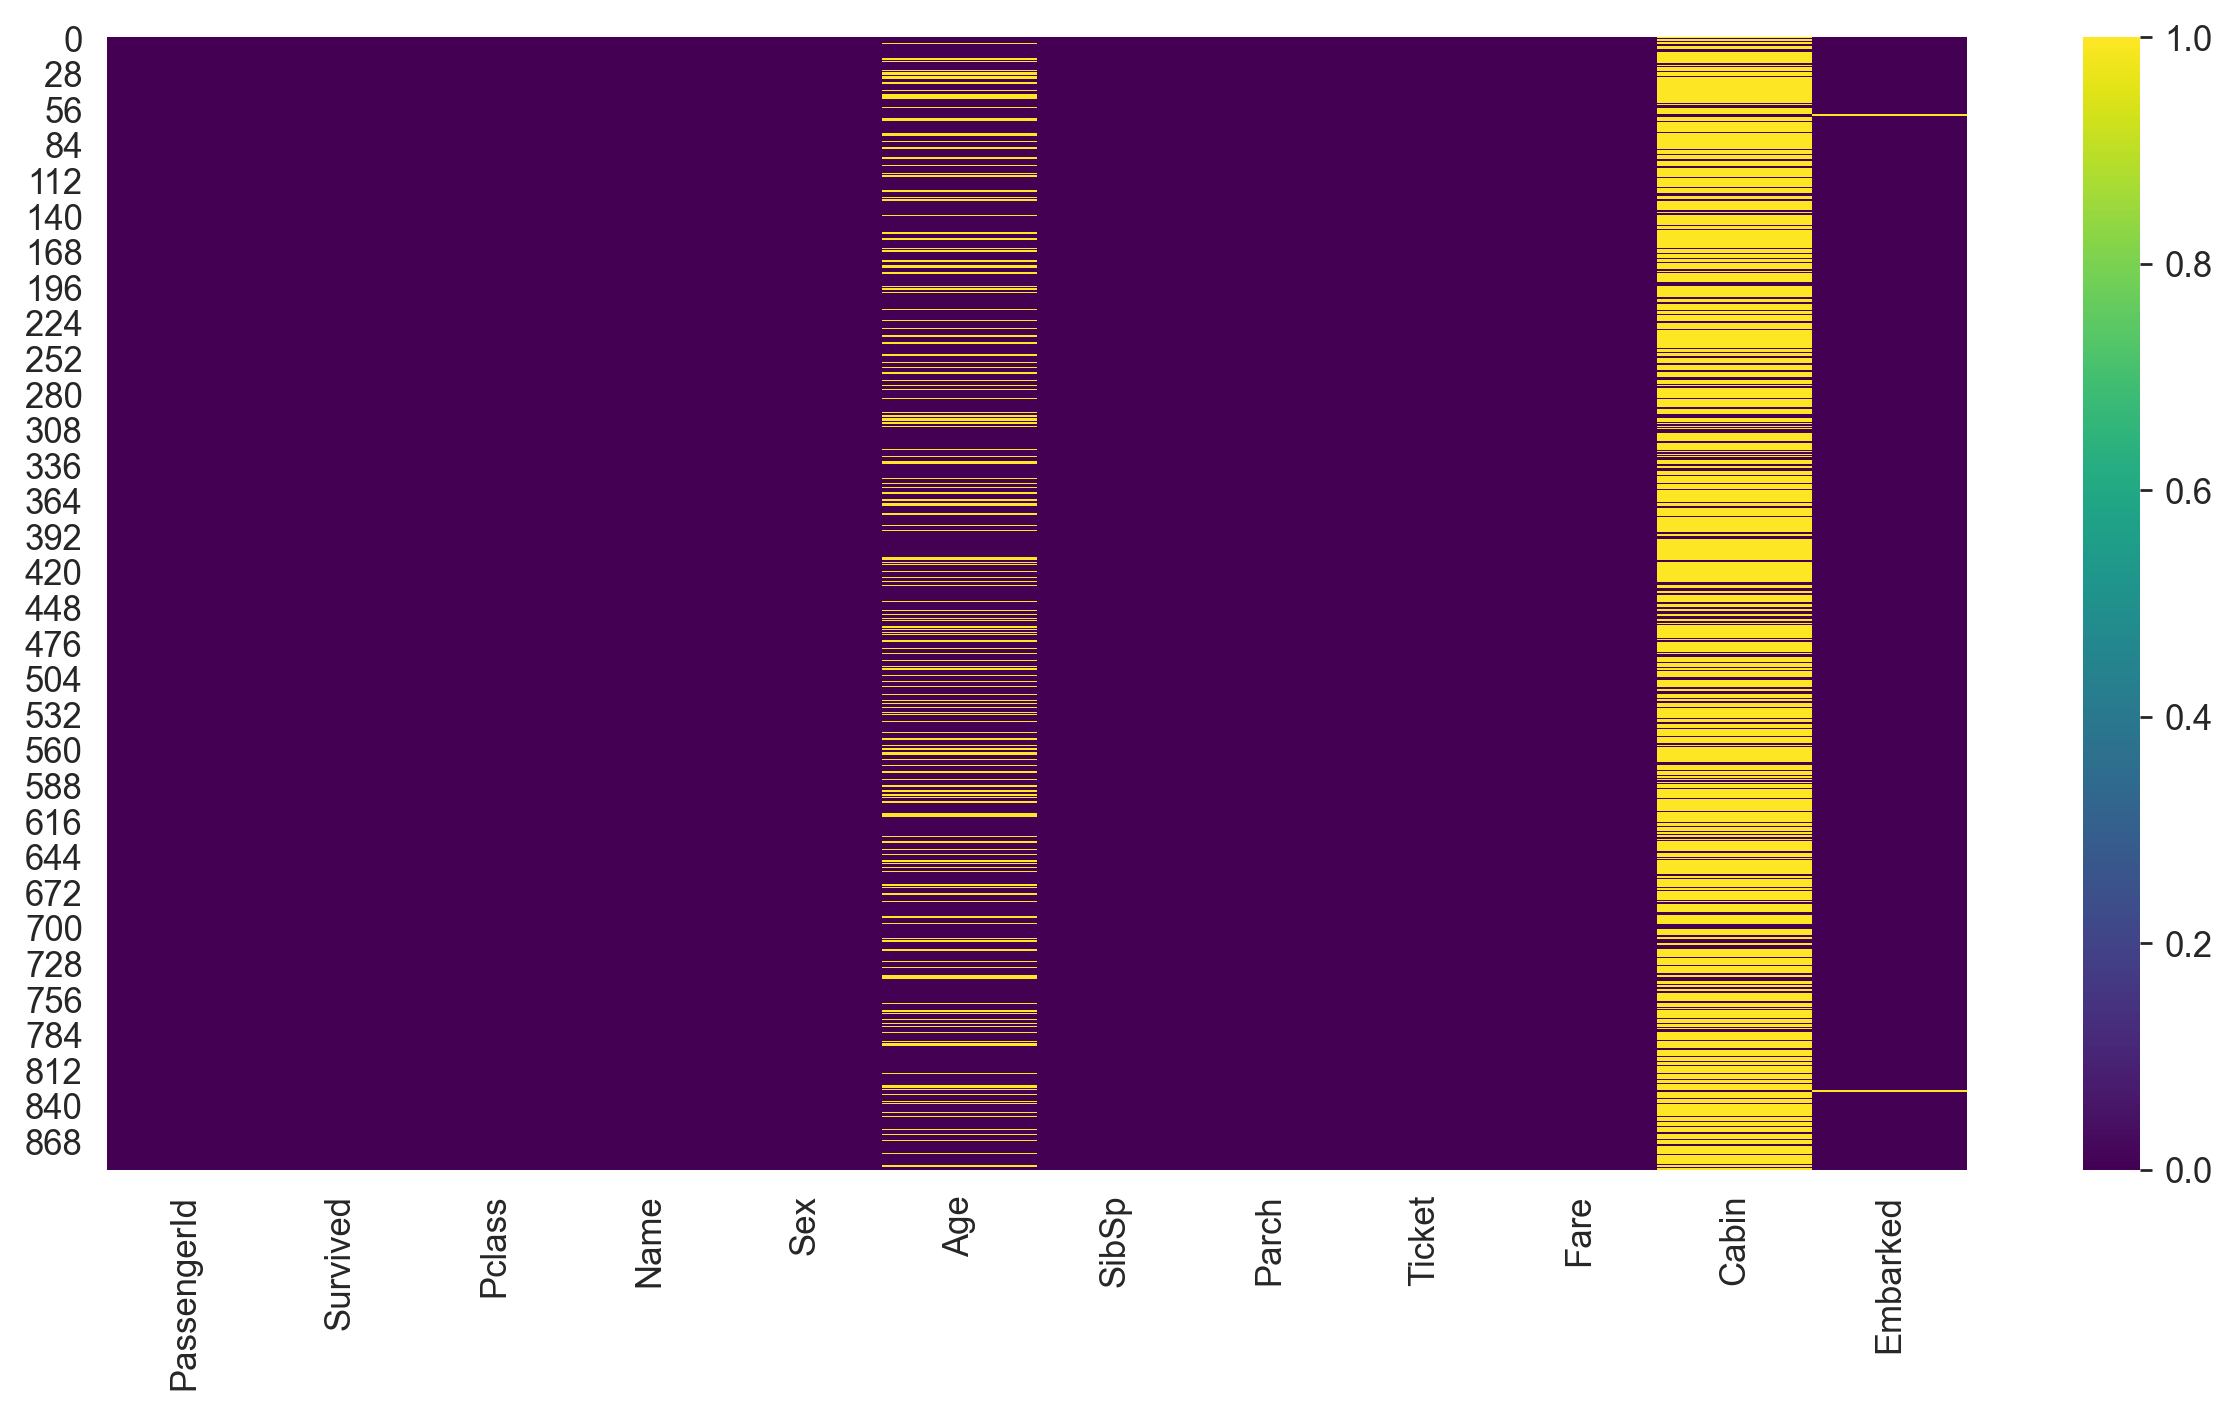

In [4]:
plt.figure(figsize=(12,6), dpi=250)
sns.heatmap(df.isnull(), cmap='viridis')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Como se puede observar, tenemos una gran cantidad de datos perdidos en las variables 'Age' (edad) 177 datos perdidos y 'Cabin' (Cabina del pasajero) 687 datos perdidos. Además tenemos una pequeña cantidad de datos perdidos en 'Embarked' (Ciudad de embarque del pasajero) 2 datos perdidos. En resumen, tenemos los siguientes porcentajes de datos perdidos:
* Age: 19,89%
* Cabin: 77,1%
* Embarked: 0,22%

***
#### Mediante Feature engineering podemos obtener el nivel del barco en que los pasajeros se encontraban, tomando la letra de 'Cabin' y transformarlo en una variable numerica para los 204 pasajeros que tienen el dato, es decir, el 22.89% de los datos de este caso de estudio.

In [6]:
# Primero se eliminan las filas que tengan perdida la variable cabin

nivel_df = df

nivel_df = nivel_df[nivel_df['Cabin'].notna()]

nivel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.7+ KB


In [7]:
nivel_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [8]:
# Luego creamos la nueva columna "nivel"
nivel_df['Nivel'] = nivel_df['Cabin'].apply(lambda x: x[0])



In [9]:
# Transformando las letras en numeros:
nmap = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

nivel_df['Nivel'] = nivel_df['Nivel'].map(nmap)


In [10]:
nivel_df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nivel
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,7.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,3.0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,4.0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1.0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,3.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,2.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,4.0


***
# Tablas de frecuencias:
#### En está sección se obtendran los estadisticos básicos para obtener conclusiones.

### Tabla de edad (Age):

#### Calculando n de intervalos, rango y amplitud

In [11]:
# Número de intervalos:
k = int(1+3.3*np.log10(714)) # Utilizando la regla de sturges
k

10

In [12]:
# Rango:
rango = df['Age'].max() - df['Age'].min()
rango

79.58

In [13]:
# Amplitud:
amplitud = int(rango/k)
amplitud

7

In [14]:
minimo = int(df['Age'].min())
maximo = int(df['Age'].max())


edades = np.array(df['Age'].sort_values()) # edades ordenadas de menor a mayor

# Calculando los intervalos:
intervalos = pd.interval_range(
    start = minimo,
    end = maximo,
    periods = k,
    name = "Intervalo",
    closed = "left")

# Calculando fi:
fi = []

f = 0
for intervalo in intervalos:
    for i, edad in enumerate(edades):
        if edad <= intervalo.right:
            f +=1
            edades[i] = 500000 # Se define un numero grande para que esa edad ya no sea contemplada        
    fi.append(f)
    f = 0

tabla_edad = pd.DataFrame(index=intervalos)

# Calculando FI:
FI = []

aux = 0
for i in fi:
    aux = aux + i
    FI.append(aux)

# Calculando la frecuencia relativa:
f_rel = []

for i in fi:
    f_rel.append(i/714)

# Calculando la frecuencia relativa acumulada:
f_rel_acum = []

aux = 0

for i in f_rel:
    aux = aux + i
    f_rel_acum.append(aux)

# Calculando la marca de clase 


marca_clase = []

for i in intervalos:
    marca_clase.append((i.left + i.right)/2)

In [15]:
tabla_edad['fi'] = fi
tabla_edad['FI'] = FI
tabla_edad['f. relativa'] = f_rel
tabla_edad['f. rel acumulada'] = f_rel_acum
tabla_edad['Marca de clase'] = marca_clase

In [16]:
tabla_edad

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[0, 8)",54,54,0.075630,0.075630,4.0
"[8, 16)",46,100,0.064426,0.140056,12.0
"[16, 24)",177,277,0.247899,0.387955,20.0
"[24, 32)",169,446,0.236695,0.624650,28.0
"[32, 40)",118,564,0.165266,0.789916,36.0
"[40, 48)",70,634,0.098039,0.887955,44.0
"[48, 56)",45,679,0.063025,0.950980,52.0
"[56, 64)",24,703,0.033613,0.984594,60.0
"[64, 72)",9,712,0.012605,0.997199,68.0


#### Obteniendo otros estadisticos, media, desviacion standard, y percentiles

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Obteniendo la moda

In [18]:
df['Age'].mode()

0    24.0
dtype: float64

***
### Tabla de conyuge mas hermanos a bordo (SibSp):

#### Calculando n de intervalos, rango y amplitud

In [19]:
# Primero, se eliminaran aquellas filas que tengan 0 en sibsp ya que nos perturba el calculo de la tabla
df_sibsp = df[df['SibSp'] != 0]
df_sibsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  283 non-null    int64  
 1   Survived     283 non-null    int64  
 2   Pclass       283 non-null    int64  
 3   Name         283 non-null    object 
 4   Sex          283 non-null    object 
 5   Age          243 non-null    float64
 6   SibSp        283 non-null    int64  
 7   Parch        283 non-null    int64  
 8   Ticket       283 non-null    object 
 9   Fare         283 non-null    float64
 10  Cabin        78 non-null     object 
 11  Embarked     283 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 28.7+ KB


#### Se puede ver que quedan 283 pasajeros con 1 o mas SibSp

In [20]:
# Número de intervalos:
k = int(1+3.3*np.log10(283)) # Utilizando la regla de sturges
k # Cambiado a 7 intervalos para que los valores permanezcan enteros

9

In [21]:
# Rango:
rango = df_sibsp['SibSp'].max() - df_sibsp['SibSp'].min()
rango

7

In [22]:
# Amplitud:
amplitud = rango/k
amplitud

0.7777777777777778

In [23]:
# Aproximando amplitud a 1 para que los datos tengan sentido:
amplitud = 1

In [24]:
minimo = int(df_sibsp['SibSp'].min())

maximo = int(df_sibsp['SibSp'].max())

n_sibsp = np.array(df_sibsp['SibSp'].sort_values()) # numero de conyuges + hermanos a bordo ordenados de menor a mayor

# Calculando los intervalos:
intervalos = pd.interval_range(
    start = minimo,
    end = maximo,
    freq=amplitud,
    name = "Intervalo",
    closed = "left")

# Calculando fi:
fi = []

f = 0
for intervalo in intervalos:
    for i, sib in enumerate(n_sibsp):
        if sib <= intervalo.right:
            f +=1
            n_sibsp[i] = 500000 # Se define un numero grande para que ese SibSp ya no sea contemplado
            
    fi.append(f)
    f = 0

tabla_sibsp = pd.DataFrame(index=intervalos)

# Calculando FI:
FI = []

aux = 0
for i in fi:
    aux = aux + i
    FI.append(aux)

# Calculando la frecuencia relativa:
f_rel = []

for i in fi:
    f_rel.append(i/283)

# Calculando la frecuencia relativa acumulada:
f_rel_acum = []

aux = 0

for i in f_rel:
    aux = aux + i
    f_rel_acum.append(aux)

# Calculando la marca de clase 


marca_clase = []

for i in intervalos:
    marca_clase.append((i.left + i.right)/2)

In [25]:
tabla_sibsp['fi'] = fi
tabla_sibsp['FI'] = FI
tabla_sibsp['f. relativa'] = f_rel
tabla_sibsp['f. rel acumulada'] = f_rel_acum
tabla_sibsp['Marca de clase'] = marca_clase

In [26]:
tabla_sibsp

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[1, 2)",237,237,0.837456,0.837456,1.5
"[2, 3)",16,253,0.056537,0.893993,2.5
"[3, 4)",18,271,0.063604,0.957597,3.5
"[4, 5)",5,276,0.017668,0.975265,4.5
"[5, 6)",0,276,0.000000,0.975265,5.5
"[6, 7)",0,276,0.000000,0.975265,6.5
"[7, 8)",7,283,0.024735,1.000000,7.5


#### Obteniendo otros estadisticos, media, desviacion standard, y percentiles

In [27]:
df_sibsp['SibSp'].describe()

count    283.000000
mean       1.646643
std        1.407508
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: SibSp, dtype: float64

#### Obteniendo la moda

In [28]:
df_sibsp['SibSp'].mode()

0    1
dtype: int64

### Tabla de 'Parch' (cantidad de padres e hijos a bordo correspondientes al pasajero).

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# Primero, se eliminaran aquellas filas que tengan 0 en parch ya que nos perturba el calculo de la tabla
df_parch = df[df['Parch'] != 0]
df_parch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 7 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  213 non-null    int64  
 1   Survived     213 non-null    int64  
 2   Pclass       213 non-null    int64  
 3   Name         213 non-null    object 
 4   Sex          213 non-null    object 
 5   Age          193 non-null    float64
 6   SibSp        213 non-null    int64  
 7   Parch        213 non-null    int64  
 8   Ticket       213 non-null    object 
 9   Fare         213 non-null    float64
 10  Cabin        63 non-null     object 
 11  Embarked     213 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 21.6+ KB


In [31]:
# Número de intervalos:
k = int(1+3.3*np.log10(213)) # Utilizando la regla de sturges
k

8

In [32]:
# Rango:
rango = df_parch['Parch'].max() - df_sibsp['Parch'].min()
rango

6

In [33]:
# Amplitud:
amplitud = rango/k
amplitud

0.75

In [34]:
amplitud = 1 # Aproximando a 1 para que los datos tengan sentido.

In [35]:
minimo = int(df_parch['Parch'].min())

maximo = int(df_parch['Parch'].max())

n_parch = np.array(df_parch['Parch'].sort_values()) # numero de conyuges + hermanos a bordo ordenados de menor a mayor

# Calculando los intervalos:
intervalos = pd.interval_range(
    start = minimo,
    end = maximo,
    freq = amplitud,
    name = "Intervalo",
    closed = "left")

# Calculando fi:
fi = []

f = 0
for intervalo in intervalos:
    for i, par in enumerate(n_parch):
        if par <= intervalo.right:
            f +=1
            n_parch[i] = 500000 # Se define un numero grande para que ese SibSp ya no sea contemplado
            
    fi.append(f)
    f = 0

tabla_parch = pd.DataFrame(index=intervalos)

# Calculando FI:
FI = []

aux = 0
for i in fi:
    aux = aux + i
    FI.append(aux)

# Calculando la frecuencia relativa:
f_rel = []

for i in fi:
    f_rel.append(i/213)

# Calculando la frecuencia relativa acumulada:
f_rel_acum = []

aux = 0

for i in f_rel:
    aux = aux + i
    f_rel_acum.append(aux)

# Calculando la marca de clase 


marca_clase = []

for i in intervalos:
    marca_clase.append((i.left + i.right)/2)

In [36]:
tabla_parch['fi'] = fi
tabla_parch['FI'] = FI
tabla_parch['f. relativa'] = f_rel
tabla_parch['f. rel acumulada'] = f_rel_acum
tabla_parch['Marca de clase'] = marca_clase

In [37]:
tabla_parch

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[1, 2)",198,198,0.929577,0.929577,1.5
"[2, 3)",5,203,0.023474,0.953052,2.5
"[3, 4)",4,207,0.018779,0.971831,3.5
"[4, 5)",5,212,0.023474,0.995305,4.5
"[5, 6)",1,213,0.004695,1.000000,5.5


#### Obteniendo otros estadisticos, media, desviacion standard, y percentiles

In [38]:
df_parch['Parch'].describe()

count    213.000000
mean       1.596244
std        0.882954
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: Parch, dtype: float64

#### Obteniendo la moda

In [39]:
df_parch['Parch'].mode()

0    1
dtype: int64

### Tabla de 'Fare' (Indica lo que se pagó por el ticket).

In [40]:
# Primero veamos si hay pasajeros que no pagaron por su ticket
df[df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


#### Estos pasajeros que no pagaron por su ticket corresponden a trabajadores de diferentes areas o invitados especiales. Por ejemplo "Harrison, Mr. William" fué el secretario de "Mr Joseph Bruce Ismay" quien era dueño del titanic, fuente: https://www.encyclopedia-titanica.org/titanic-victim/william-harrison.html

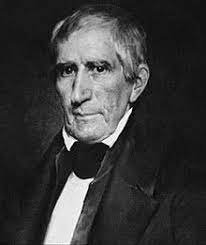


In [41]:
# Para no afectar al calculo de la tabla, estos casos especiales no serán considerados:
df_fare = df[df['Fare'] != 0]
df_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  876 non-null    int64  
 1   Survived     876 non-null    int64  
 2   Pclass       876 non-null    int64  
 3   Name         876 non-null    object 
 4   Sex          876 non-null    object 
 5   Age          707 non-null    float64
 6   SibSp        876 non-null    int64  
 7   Parch        876 non-null    int64  
 8   Ticket       876 non-null    object 
 9   Fare         876 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     874 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 89.0+ KB


In [42]:
# Número de intervalos:
k = int(1+3.3*np.log10(876)) # Utilizando la regla de sturges
k

10

In [43]:
# Rango:
rango = df_fare['Fare'].max() - df_sibsp['Fare'].min()
rango

505.83340000000004

In [44]:
# Amplitud:
amplitud = rango/k
amplitud

50.58334000000001

In [45]:
minimo = df_fare['Fare'].min()
maximo = df_fare['Fare'].max()


n_fare = np.array(df_fare['Fare'].sort_values()) # dinero pagado por ticket, ordenado de menor a mayor.

# Calculando los intervalos:
intervalos = pd.interval_range(
    start = minimo,
    end = maximo,
    periods = k,
    name = "Intervalo",
    closed = "left")

# Calculando fi:
fi = []

f = 0
for intervalo in intervalos:
    for i, fare in enumerate(n_fare):
        if fare <= intervalo.right:
            f +=1
            n_fare[i] = 500000 # Se define un numero grande para que esa edad ya no sea contemplada        
    fi.append(f)
    f = 0

tabla_fare = pd.DataFrame(index=intervalos)

# Calculando FI:
FI = []

aux = 0
for i in fi:
    aux = aux + i
    FI.append(aux)

# Calculando la frecuencia relativa:
f_rel = []

for i in fi:
    f_rel.append(i/876)

# Calculando la frecuencia relativa acumulada:
f_rel_acum = []

aux = 0

for i in f_rel:
    aux = aux + i
    f_rel_acum.append(aux)

# Calculando la marca de clase 


marca_clase = []

for i in intervalos:
    marca_clase.append((i.left + i.right)/2)

In [46]:
tabla_fare['fi'] = fi
tabla_fare['FI'] = FI
tabla_fare['f. relativa'] = f_rel
tabla_fare['f. rel acumulada'] = f_rel_acum
tabla_fare['Marca de clase'] = marca_clase

In [47]:
tabla_fare

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[4.0125, 54.844170000000005)",735,735,0.839041,0.839041,29.428335
"[54.844170000000005, 105.67584000000001)",88,823,0.100457,0.939498,80.260005
"[105.67584000000001, 156.50751)",31,854,0.035388,0.974886,131.091675
"[156.50751, 207.33918)",2,856,0.002283,0.977169,181.923345
"[207.33918, 258.17085000000003)",11,867,0.012557,0.989726,232.755015
"[258.17085000000003, 309.00252)",6,873,0.006849,0.996575,283.586685
"[309.00252, 359.83419)",0,873,0.000000,0.996575,334.418355
"[359.83419, 410.66586)",0,873,0.000000,0.996575,385.250025
"[410.66586, 461.49753000000004)",0,873,0.000000,0.996575,436.081695


#### Obteniendo otros estadisticos, media, desviacion standard, y percentiles

In [48]:
df_fare['Fare'].describe()

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

#### Obteniendo la moda

In [49]:
df_fare['Fare'].mode()

0    8.05
dtype: float64

### Tabla de 'Nivel' (Indica el nivel del barco en que se hospedaba el pasajero).

In [50]:
# Número de intervalos:
k = int(1+3.3*np.log10(203)) # Utilizando la regla de sturges
k

8

In [51]:
# Rango:
rango = nivel_df['Nivel'].max() - nivel_df['Nivel'].min()
rango

6.0

In [52]:
# Amplitud:
amplitud = rango/k
amplitud

0.75

In [53]:
# Aproximando amplitud a 1 para que los datos tengan sentido:
amplitud = 1

In [54]:
minimo = nivel_df['Nivel'].min()
maximo = nivel_df['Nivel'].max()


n_nivel = np.array(nivel_df['Nivel'].sort_values()) # niveles ordenados de menor a mayor.

# Calculando los intervalos:
intervalos = pd.interval_range(
    start = minimo,
    end = maximo,
    freq = amplitud,
    name = "Intervalo",
    closed = "left")

# Calculando fi:
fi = []

f = 0
for intervalo in intervalos:
    for i, nivel in enumerate(n_nivel):
        if nivel <= intervalo.right:
            f +=1
            n_nivel[i] = 500000 # Se define un numero grande para que esa edad ya no sea contemplada        
    fi.append(f)
    f = 0

tabla_nivel = pd.DataFrame(index=intervalos)

# Calculando FI:
FI = []

aux = 0
for i in fi:
    aux = aux + i
    FI.append(aux)

# Calculando la frecuencia relativa:
f_rel = []

for i in fi:
    f_rel.append(i/203)

# Calculando la frecuencia relativa acumulada:
f_rel_acum = []

aux = 0

for i in f_rel:
    aux = aux + i
    f_rel_acum.append(aux)

# Calculando la marca de clase 


marca_clase = []

for i in intervalos:
    marca_clase.append((i.left + i.right)/2)

In [55]:
tabla_nivel['fi'] = fi
tabla_nivel['FI'] = FI
tabla_nivel['f. relativa'] = f_rel
tabla_nivel['f. rel acumulada'] = f_rel_acum
tabla_nivel['Marca de clase'] = marca_clase

In [56]:
tabla_nivel

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[1.0, 2.0)",62,62,0.305419,0.305419,1.5
"[2.0, 3.0)",59,121,0.290640,0.596059,2.5
"[3.0, 4.0)",33,154,0.162562,0.758621,3.5
"[4.0, 5.0)",32,186,0.157635,0.916256,4.5
"[5.0, 6.0)",13,199,0.064039,0.980296,5.5
"[6.0, 7.0)",4,203,0.019704,1.000000,6.5


#### Obteniendo otros estadisticos, media, desviacion standard, y percentiles

In [57]:
nivel_df['Nivel'].describe()

count    203.000000
mean       3.369458
std        1.444160
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Nivel, dtype: float64

#### Obteniendo la moda

In [58]:
nivel_df['Nivel'].mode()

0    3.0
dtype: float64

***
# Formulando y respondiendo preguntas

#### En esta sección se responderá a las siguientes preguntas que nos parecen interesantes:

* #### El sexo fue un factor de impacto para la supervivencia de los pasajeros?
* #### La edad de los pasajeros fue un factor que impactó en la supervivencia?
* #### El nivel socio economico de los pasajeros ayudó a que estos tuviesen prioridad ante el resto?
* #### Quienes tuvieron mas posibilidades de sobrevivir?, los de las plantas mas bajas o mas altas del barco?
* #### El precio del ticket afectó a sus posibilidades de sobrevivir?
* #### Tener familia a bordo afectó a la tasa de supervivencia de los pasajeros?
* #### Cual era el nivel socio economico promedio de cada lugar de embarco?



#### Antes de comenzar a responder las preguntas formuladas anteriormente, revisemos los datos a gran escala.

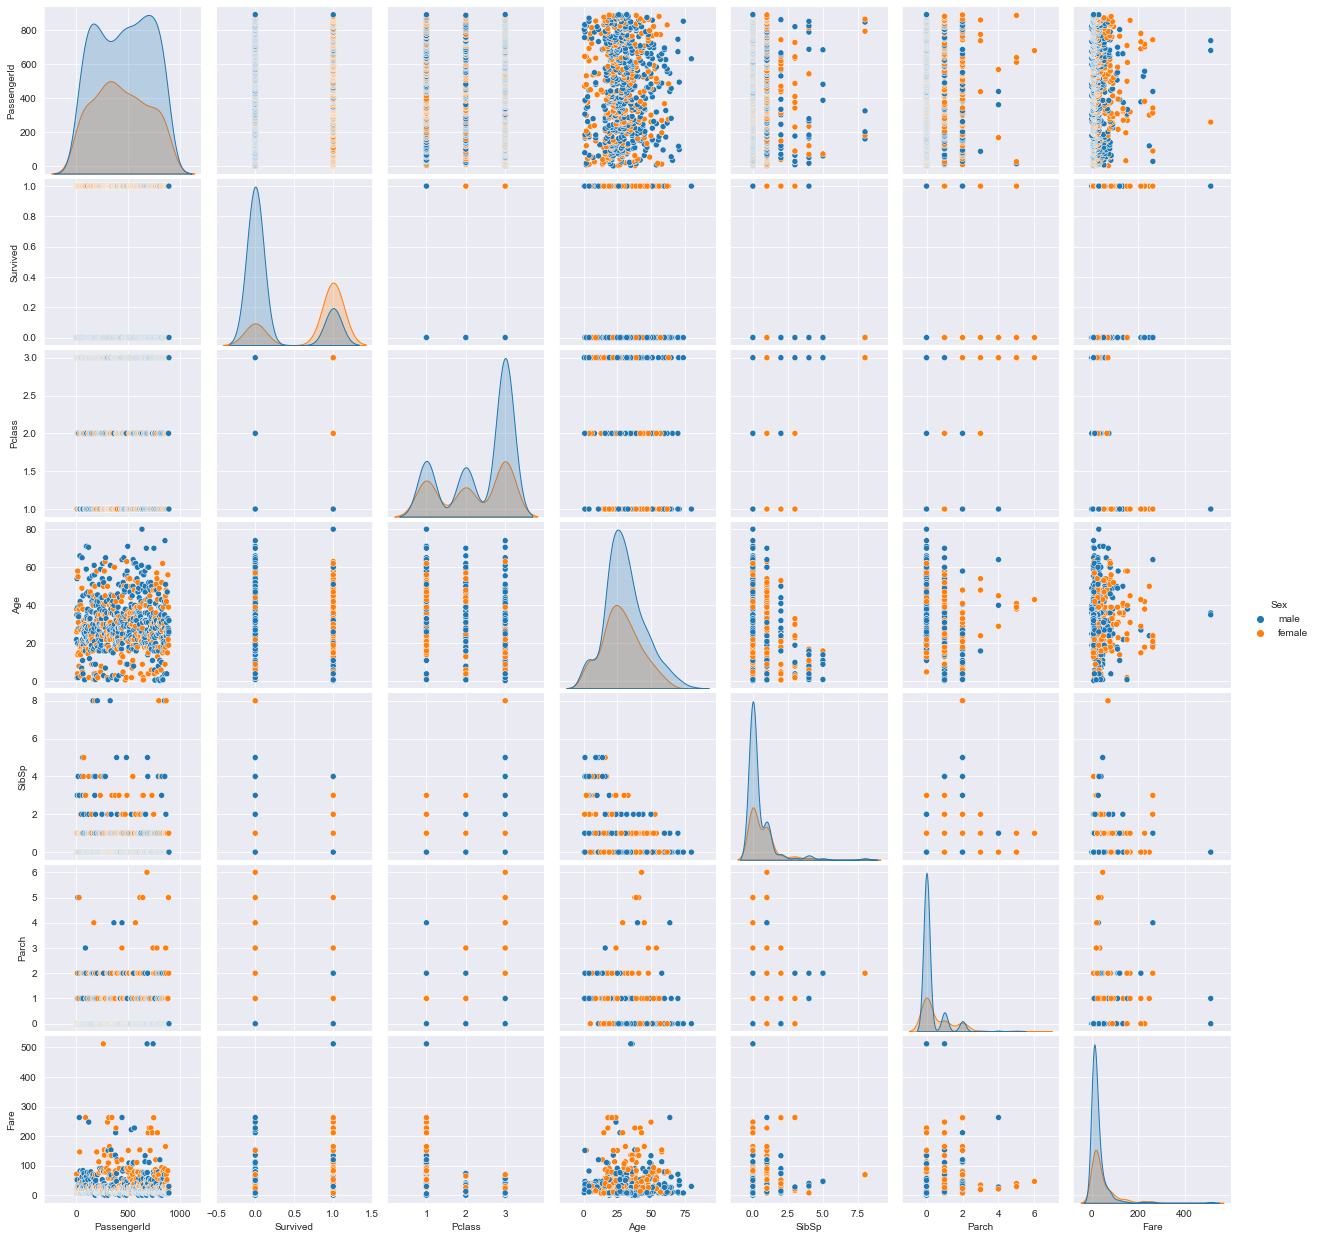

In [59]:
sns.pairplot(df, hue='Sex')

#### Revisando a alto nivel la matriz de graficos anterior, podemos notar rapidamente que al parecer el sexo que mas sobrevivió fué el femenino, que la edad promedio de las mujeres es  inferior a la de los hombres y que al parecer la clase socio economica del pasajero si ayudó a la supervivencia. Centremonos en cada pregunta en particular y analisemos su lógica.

### 1- El sexo fue un factor de impacto para la supervivencia de los pasajeros?

#### En los libros, historias, peliculas y documentales se hace famosa la frase "Mujeres y niños primero" a la hora de abordar los barcos salva vidas, pero, esto fué realmente como se cuenta? analisemos los datos.

#### Primero, veamos la distribucion del sexo de los pasajeros:

<AxesSubplot:xlabel='Sex', ylabel='count'>

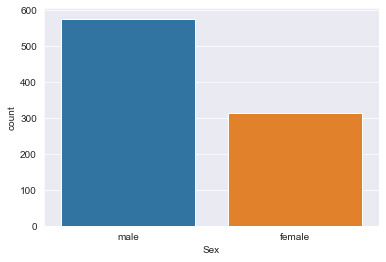

In [60]:
sns.countplot(x='Sex', data=df)

In [61]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Como podemos observar, se tiene que de un total de 891 datos para este caso de estudio, el 64.76% de los pasajeros eran hombres y el 35.24% eran mujeres.

#### Ahora, veamos las edades de los pasajeros por sexo.

<AxesSubplot:xlabel='Age', ylabel='Sex'>

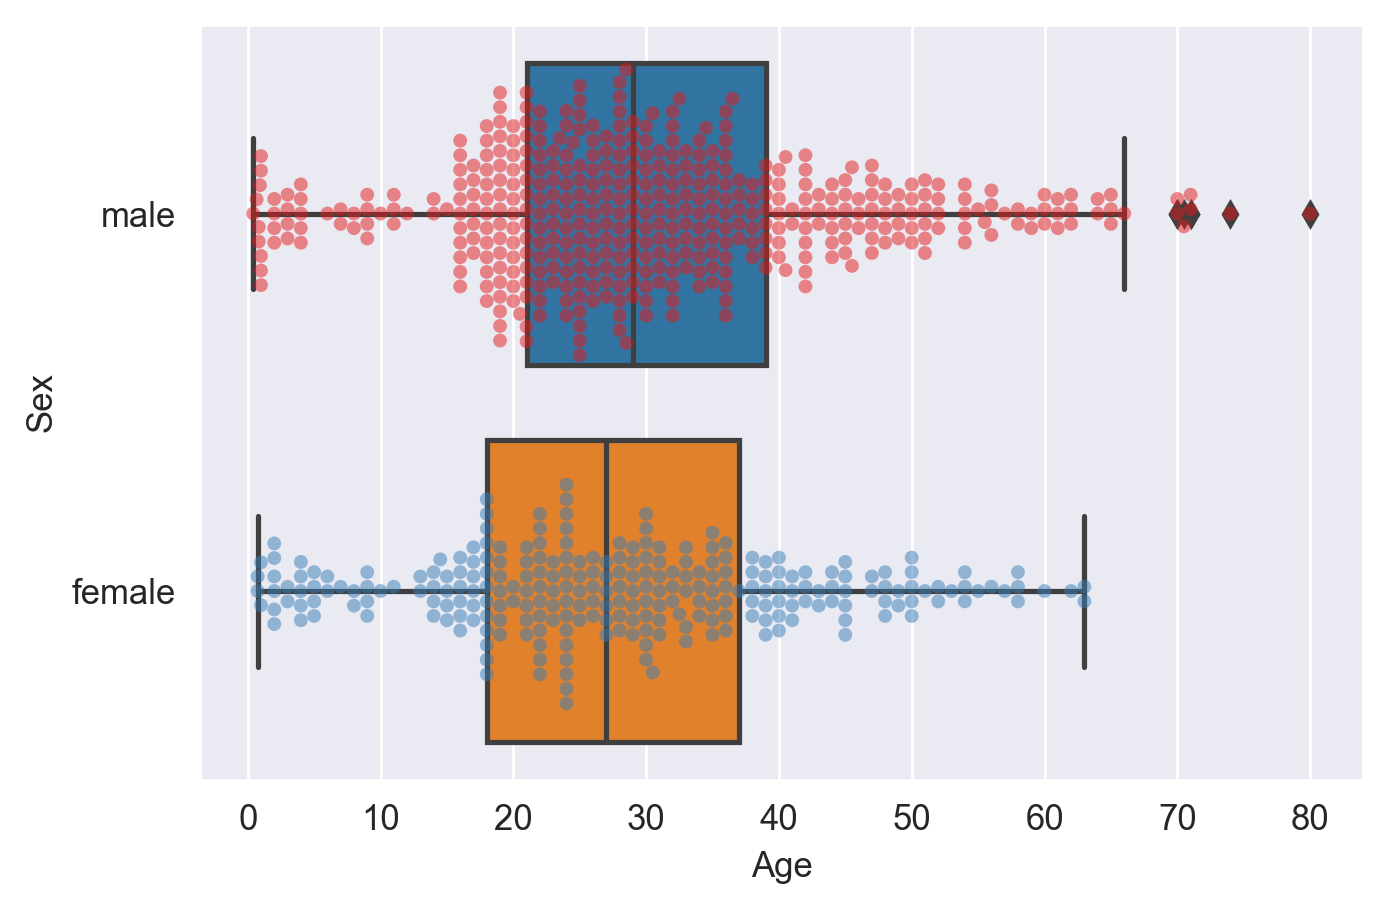

In [62]:
plt.figure(dpi=250)
sns.boxplot(x='Age', y='Sex', data=df)
sns.swarmplot(x='Age', y='Sex', size=4, dodge=True, data=df, palette='Set1', alpha=0.5)

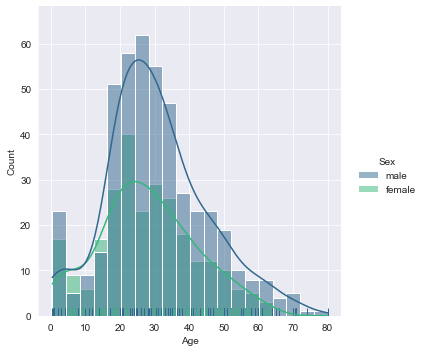

In [63]:
sns.displot(data=df, x='Age', hue='Sex', kde=True, rug=True, palette='viridis')

Se puede notar que la edad promedio del sexo femenino es menor a la de los hombres. Observando el boxplot, se puede observar que la mediana del sexo masculino es mayor y que tiene valores extremos que alcanzan los 80 años. Observando el gráfico de distribución se puede observar que la mediana del sexo masculino está entre los 25 y 30 años. Para el caso femenino, la mediana está entre los 20 y 25 años.

#### Ahora analizemos lo principal, que tanto afectó el sexo al porcentaje de supervivencia?

<AxesSubplot:xlabel='Sex', ylabel='count'>

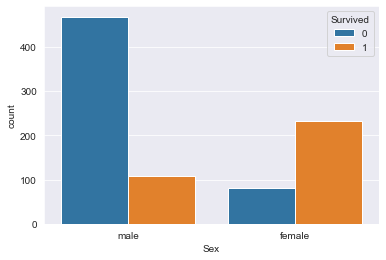

In [64]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [65]:
df[['Sex', 'Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

Observando el grafico, facilmente se puede observar que las mujeres tienen una tasa de sobrevivencia mayor que la de los hombres. de 342 pasajeros que sobrevivieron, lo que corresponde al 38.38% del total de pasajeros de este caso de estudio, las mujeres tienen un 68.13% de sobrevivencia, mientras que los hombres tienen un 31.87% de sobrevivencia. Por lo que ser mujer en el titanic, definitivamente aumentaba las posibilidades de sobrevivir.

### 2- La edad de los pasajeros fué un factor que impactó en la sobrevivencia?

#### El estado fisico de los pasajeros pudo ser un factor determinante en el porcentaje de sobrevivencia, ya que, logicamente de los pasajeros que no alcanzaron a abordar un bote salvavidas, los que mas tenian posibilidades de sobrevivir a las gelidas aguas eran los con mayor estado fisico, lo cual está vinculado a la edad de los pasajeros. Por lo cual analizar la edad se hace interesante.



In [83]:
tabla_edad

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[0, 8)",54,54,0.075630,0.075630,4.0
"[8, 16)",46,100,0.064426,0.140056,12.0
"[16, 24)",177,277,0.247899,0.387955,20.0
"[24, 32)",169,446,0.236695,0.624650,28.0
"[32, 40)",118,564,0.165266,0.789916,36.0
"[40, 48)",70,634,0.098039,0.887955,44.0
"[48, 56)",45,679,0.063025,0.950980,52.0
"[56, 64)",24,703,0.033613,0.984594,60.0
"[64, 72)",9,712,0.012605,0.997199,68.0


<Figure size 1500x1000 with 0 Axes>

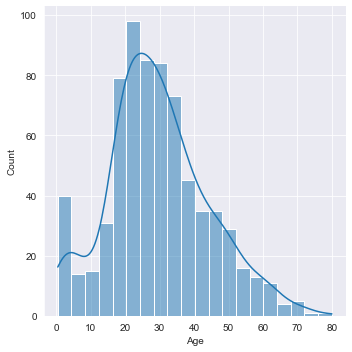

In [66]:
plt.figure(dpi=250)
sns.displot(x='Age', data=df, kde=True)

In [67]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Como se puede observar, la edad promedio de los pasajeros es de aproximadamente 30 años. Existiendo un tope de 80 años.

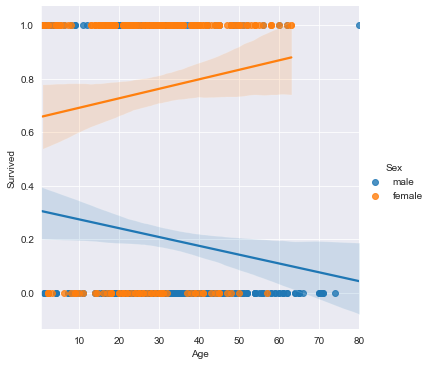

In [68]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=df)

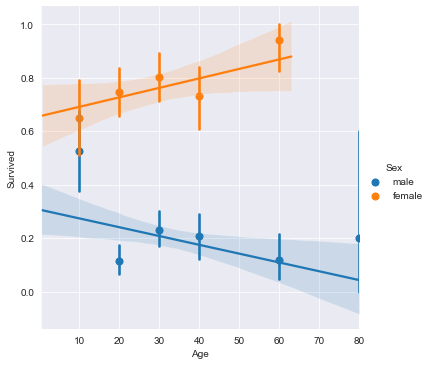

In [69]:
# Agrupando rangos de edades para graficar
g = [10, 20, 30, 40, 60, 80]
sns.lmplot('Age','Survived',hue='Sex',data=df,x_bins=g)

Es interesante observar como a medida que aumenta la edad en las mujeres, mas posibilidades tienen de sobrevivir, a comparación de los hombres, en donde a medida que aumenta la edad, menor se hace la posibilidad, a excepcion de los niños. Pueden existir algunos casos especiales en donde un hombre de edad avanzada puede sobrevivir. Esto puede ser por el estatus economico o porque al ser de avanzada edad, le dieron un espacio en algun bote salvavidas. Por lo que se puede concluir que las personas jovenes tenian mas posibilidades de sobrevivir que las personas de mayor edad que no alcanzaron a abordar un bote salvavidas.

### 3- El nivel socio economico de los pasajeros ayudó a que estos tuviesen prioridad ante el resto?

#### Por lógica, los pasajeros con mayor estatus social deberian tener mayores posibilidades de sobrevivir, ya que, pudieron usar su influencia y su dinero para persuadir a las personas y asegurar un puesto en algun bote salvavidas y por ende, tener un mayor porcentaje de sobrevivencia, pero, esto es así?

Primero, teniendo en cuenta de que la edad es un factor que a medida que aumenta disminuye las posibilidades de sobrevivencia, y que por logica las personas de mayor estatus economico deberian ser mayores al resto. Analizemos su distribución.

<Figure size 1500x1000 with 0 Axes>

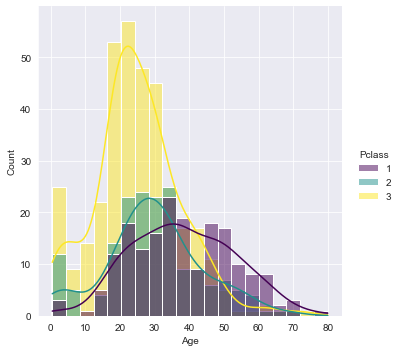

In [70]:
plt.figure(dpi=250)
sns.displot(x='Age', hue='Pclass', data=df, kde=True, palette='viridis')

Claramente las personas de primera clase económica tienden a ser mayores en edad al resto, por lo cual es un factor a considerar.

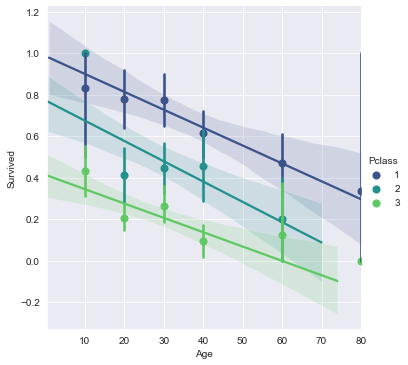

In [82]:
g = [10, 20, 30, 40, 60, 80]
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='viridis',x_bins=g)

In [72]:
df[['Pclass', 'Survived']].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

Claramente se puede observar que, a pesar de que las posibilidades de sobrevivir bajen al tener mas edad, la clase del pasajero aumenta las posibilidades de sobrevivencia. de un total de 216 personas de primera clase, el 62.96% sobrevivió, en contraste con la tercera clase, que de un total de 491, el 36.56% de las personas sobrevivió. Por lo tanto, la clase de la persona, definitivamente ayudó al momento de determinar su destino en el accidente del titanic.

### 4- Quienes tuvieron mas posibilidades de sobrevivir?, los de las plantas mas bajas o mas altas del barco?

Es interesante analizar si el nivel del barco en que se encontraban los pasajeros afectó a su ratio de supervivencia. Según la pelicula, los pasajeros de tercera clase, es decir, los de las plantas mas bajas estaban encerrados. Pero esto es así?, analicemos los datos para ver si efectivamente las personas en niveles del barco mas cercanos a la cubierta tuvieron mas posibilidades de sobrevivir.

In [84]:
tabla_nivel

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[1.0, 2.0)",62,62,0.305419,0.305419,1.5
"[2.0, 3.0)",59,121,0.290640,0.596059,2.5
"[3.0, 4.0)",33,154,0.162562,0.758621,3.5
"[4.0, 5.0)",32,186,0.157635,0.916256,4.5
"[5.0, 6.0)",13,199,0.064039,0.980296,5.5
"[6.0, 7.0)",4,203,0.019704,1.000000,6.5


In [85]:
nivel_df['Nivel'].describe()

count    203.000000
mean       3.369458
std        1.444160
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Nivel, dtype: float64

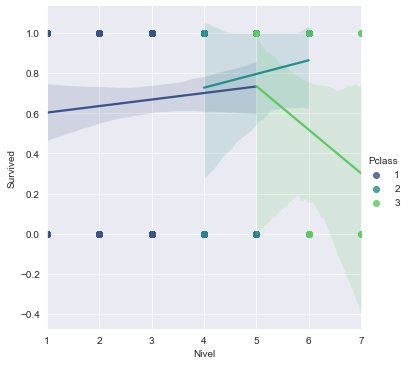

In [87]:
sns.lmplot('Nivel','Survived',hue='Pclass',data=nivel_df,palette='viridis')

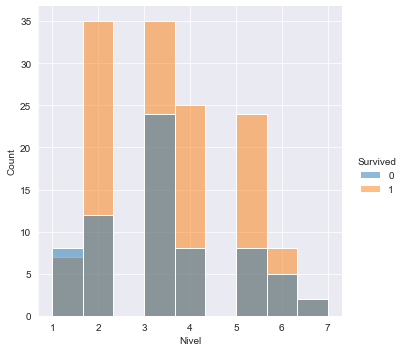

In [93]:
sns.displot(x='Nivel', hue='Survived', data=nivel_df)

#### Claramente se puede observar que los niveles 2, 4 y 5, que el nivel 2 tenga ventaja frente al resto tiene sentido ya que es el nivel con acceso mas rapido a la cubierta. Se hace interesante observar que los mayores ratios de supervivencia están en la segunda clase y que este aumenta a medida que aumenta el nivel, pero, por que?. veamos un video de como se hundió el titanic y analicemos su plano para ver si los datos tienen sentido.

In [137]:
HTML("""
<video width="800" height="600" controls>
<source src="archivos/Titanic.mp4" type="video/mp4">
</video>
""")

<img src='archivos/plano.jpg'>

Como se puede observar del video extraido de un documental de national geographic chanel "
Titanic 100 : New CGI of How Titanic Sank | Titanic 100" el titanic se hundió de proa, por lo cual al ver el plano del titanic y recordando el analisis del grafico de los niveles separados por clase, tiene sentido que los pasajeros de segunda clase sean los que tuvieron mayores ratios de supervivencia, ya que, fueron los que tuvieron mas tiempo para poder reaccionar frente al hundimiento.

In [100]:
niv = nivel_df.groupby(by='Nivel').mean()

In [101]:
niv

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Nivel,,,,,,,
1.0,439.600000,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887
2.0,521.808511,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764
3.0,406.440678,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341
4.0,475.939394,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576
5.0,502.437500,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694
6.0,370.384615,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792
7.0,216.000000,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250


En conclusión frente a esta pregunta, el nivel en el que se encontraban las personas dentro del titanic si afectó, pero por si solo no es un indicador muy bueno, ya que depende de otros factores, por ejemplo, concluir que si estas alojado en el nivel 4 tienes un %75 de sobrevivir es incorrecto ya que afecta profundamente si el pasajero está en la proa o en la popa.

### 5- El precio del ticket afectó a sus posibilidades de sobrevivir?

#### Dentro del titanic existian suits de lujo, las cuales tenian un valor ticket muy alto, por lo que resulta interesante saber si efectivamente pagar mas por el ticket aumentó la prioridad de los pasajeros frente al resto y por ende aumentar su tasa de supervivencia.

Primero, resulta interesante saber quienes pagaron los tickets mas altos y saber un poco de su ocupación u cargo.

In [105]:
df_fare['Fare'].describe()

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [103]:
tabla_fare

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[4.0125, 54.844170000000005)",735,735,0.839041,0.839041,29.428335
"[54.844170000000005, 105.67584000000001)",88,823,0.100457,0.939498,80.260005
"[105.67584000000001, 156.50751)",31,854,0.035388,0.974886,131.091675
"[156.50751, 207.33918)",2,856,0.002283,0.977169,181.923345
"[207.33918, 258.17085000000003)",11,867,0.012557,0.989726,232.755015
"[258.17085000000003, 309.00252)",6,873,0.006849,0.996575,283.586685
"[309.00252, 359.83419)",0,873,0.000000,0.996575,334.418355
"[359.83419, 410.66586)",0,873,0.000000,0.996575,385.250025
"[410.66586, 461.49753000000004)",0,873,0.000000,0.996575,436.081695


Se puede ver que hay 3 personas que estan dentro del rango de los tickets mas caros, veamos quienes eran.

In [106]:
df_fare[df_fare['Fare'] > 460]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


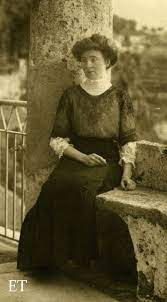


Miss Annie Moore Ward: Fue la sirvienta de Mrs Charlotte Wardle Cardeza hija del empresario  Mr Thomas Drake Martinez Cardeza. Ellos ocuparon las suits mas caras del titanic y sobrevivieron a este.

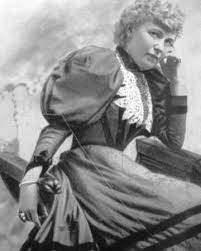

Mrs Charlotte Wardle Cardeza: Hija del empresario Mr Thomas Drake Martinez Cardeza.

<img src="https://www.encyclopedia-titanica.org/images/thomas-cardeza-1917-H.jpg">

Mr Thomas Drake Martinez Cardeza: Empresario

<AxesSubplot:xlabel='Fare'>

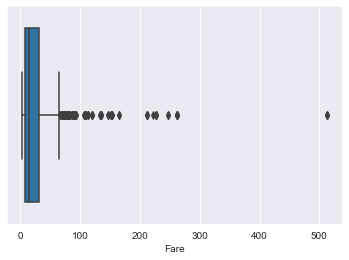

In [116]:
sns.boxplot(x='Fare',data=df_fare)

Como podemos observar los precios de los tickets estan altamente concentrados entre 0 y 100. Los precios de las suites estan representadas como valores extremos por lo que se trata de una cantidad de personas muy reducida.

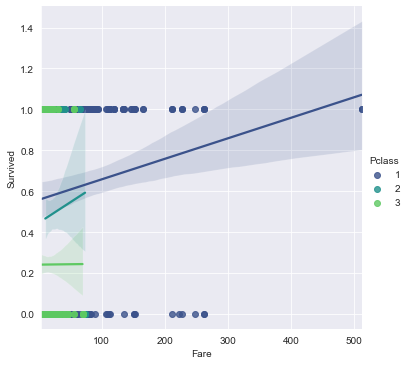

In [118]:
sns.lmplot('Fare','Survived',hue='Pclass',data=df_fare,palette='viridis')

Se puede observar claramente que los que pagaron mas por su tickets tienen mas posibilidades de sobrevivir, aun mas, existe un comportamiento casi lineal entre el precio del ticket y el indice de supervivencia.

mayor precio del ticket = mayor % de supervivencia.

In [120]:
far = df_fare.groupby(by='Fare').mean()
far

,PassengerId,Survived,Pclass,Age,SibSp,Parch
Fare,,,,,,
4.0125,379.00,0.00,3.0,20.000000,0.00,0.000000
5.0000,873.00,0.00,1.0,33.000000,0.00,0.000000
6.2375,327.00,0.00,3.0,61.000000,0.00,0.000000
6.4375,844.00,0.00,3.0,34.500000,0.00,0.000000
6.4500,819.00,0.00,3.0,43.000000,0.00,0.000000
...,...,...,...,...,...,...
227.5250,589.25,0.75,1.0,32.666667,0.25,0.000000
247.5208,209.50,0.50,1.0,37.000000,0.00,1.000000
262.3750,527.50,1.00,1.0,19.500000,2.00,2.000000


En conclusion, definitivamente el precio del ticket tiene un impacto en el ratio de supervivencia.

### 6- Tener familia a bordo afectó a la tasa de supervivencia de los pasajeros?

#### Por logica tener familia a bordo puede ser un factor de impacto negativo para los ratios de supervivencia con una cuestion afectiva, por lo que se hace interesante analizar si esta hipotesis es verdadera.

In [121]:
tabla_sibsp

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[1, 2)",237,237,0.837456,0.837456,1.5
"[2, 3)",16,253,0.056537,0.893993,2.5
"[3, 4)",18,271,0.063604,0.957597,3.5
"[4, 5)",5,276,0.017668,0.975265,4.5
"[5, 6)",0,276,0.000000,0.975265,5.5
"[6, 7)",0,276,0.000000,0.975265,6.5
"[7, 8)",7,283,0.024735,1.000000,7.5


In [122]:
tabla_parch

,fi,FI,f. relativa,f. rel acumulada,Marca de clase
Intervalo,,,,,
"[1, 2)",198,198,0.929577,0.929577,1.5
"[2, 3)",5,203,0.023474,0.953052,2.5
"[3, 4)",4,207,0.018779,0.971831,3.5
"[4, 5)",5,212,0.023474,0.995305,4.5
"[5, 6)",1,213,0.004695,1.000000,5.5


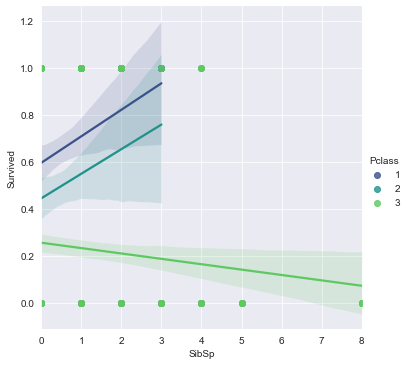

In [123]:
sns.lmplot('SibSp','Survived',hue='Pclass',data=df_fare,palette='viridis')

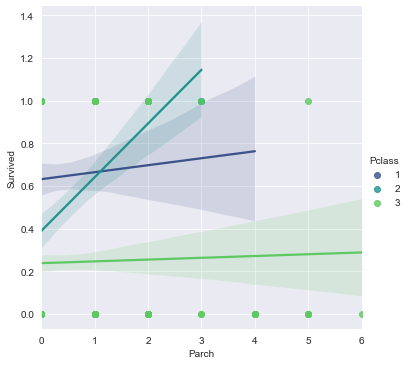

In [124]:
sns.lmplot('Parch','Survived',hue='Pclass',data=df_fare,palette='viridis')

In [127]:
sib = df_sibsp.groupby(by='SibSp').mean()
sib

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


In [129]:
par = df_parch.groupby(by='Parch').mean()
par

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
1,465.110169,0.550847,2.20339,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.27500,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.60000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.50000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.00000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.00000,43.000000,1.000000,46.900000


Este caso es muy interesante ya que, al ver los diagramas de regression lineal se puede observar que la clase economica de los pasajeros importa mucho, ya que, mientras mayor cantidad de familiares poseen las clases 1 y 2, mayor es su ratio de supervivencia. Esto es debido a que las personas que son de clase alta y tienen familiares a bordo, corresponde a personas con gran nivel monetario, por lo que, usando su influencia pudieron asegurar un espacio en los botes salvavidas para ellos y su familia. En cambio, para la tercera clase (la mas baja) se puede notar que es el caso contrario. Mientras mayor cantidad de familiares a bordo tienen, menor es su ratio de supervivencia. Por lo que, a modo de conclusion, este indicador por si solo no es realista, ya que, depende del nivel socio economico de la familia.

### 7- Cual era el nivel socio economico promedio de cada lugar de embarco?

#### Resulta interesante saber el estatus socio economico de cada lugar de embarco a traves de los datos, cruzando el lugar de embarco, el coste del boleto y la clase socio economia.

In [132]:
emb = df.groupby(by='Embarked').mean()
emb

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


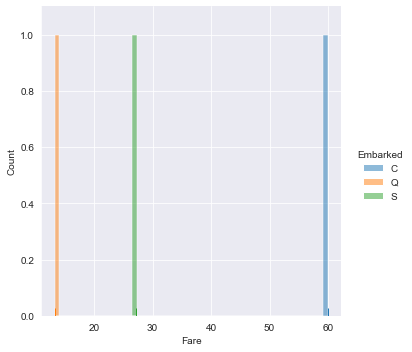

In [136]:
sns.displot(x='Fare', hue='Embarked',rug=True, data=emb, bins=60)

Como se puede ver, hay una clara diferencia socio economica por lugar de embarco, el de menor ingreso es Queenstown, Irlanda, en medio tenemos a Southampton, Inglaterra y se puede ver que existe una clara diferencia entre estos y Cherbourg, Francia. Se puede concluir que en 1909 Irlanda no pasaba por un buen momento, Francia gozaba de una gran economía y que ni combinando Irlanda e Inglaterra se puede alcanzar el nivel socio economico de Francia en ese entonces.